In [1]:
#project: P1
#submitter: shizmi
#partner: None

In [2]:
%matplotlib inline
import numpy as np
import os, subprocess, json, random, string, time
from matplotlib import pyplot as plt
from datetime import datetime # yes, both the module and type are named datetime
import matplotlib.ticker as ticker
from pandas import Series, pandas as pd
from git import Repo
dirname = "repo"
repo = Repo(dirname)
repo.git.checkout("master")

''

In [3]:
# q1
len(list(repo.iter_commits()))

8

In [4]:
#q2
commits = list(repo.iter_commits())
commitsAuthor = {}
for commit in commits:
    if commit.author.name not in commitsAuthor:
        commitsAuthor[commit.author.name] = 1
    else:
        commitsAuthor[commit.author.name] += 1
commitsAuthor

{'Steve': 3, 'Ada': 3, 'Linus': 2}

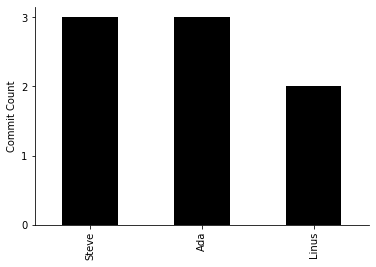

In [5]:
#q3
def get_ax():
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax
ax = get_ax()
ax.set_ylabel("Commit Count")
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))
Series(commitsAuthor).plot.bar(ax=ax,color='black')

In [6]:
#q4
commits = list(repo.iter_commits())
people = set()
for i in range(len(commits)):
    dt = datetime.fromtimestamp(commits[i].authored_date)
    if dt.weekday() == 5 or dt.weekday() == 6:
        people.add(commits[i].author.name)
people

{'Steve'}

In [7]:
commits = list(repo.iter_commits())[::-1]
lines = []
days = []
for commit in commits:
    lineCount = 0
    repo.git.checkout(commit)
    with open(os.path.join('repo','wc.py')) as f:
        for line in f:
            lineCount += 1
    lines.append(lineCount)
    days.append(datetime.fromtimestamp(commit.authored_date))
    
day_list = []
first_day = days[0]
for i in range(len(days)):
    day_list.append((days[i] - first_day ).seconds / 86400 + ( days[i] - first_day).days)

In [8]:
#q5 
df = pd.DataFrame(list(zip(day_list, lines)), 
               columns =['days', 'lines']) 
df

,days,lines
0,0.000000,21
1,1.005046,35
2,3.880046,35
3,4.087963,39
4,5.921296,40
5,6.962963,40
6,9.171296,40
7,11.046296,43


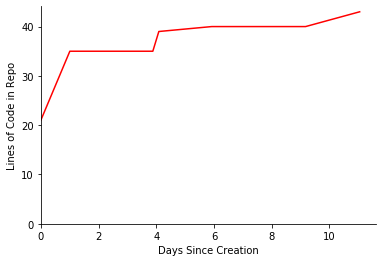

In [9]:
#q6
ax = get_ax()
ax.plot(day_list, lines, color ='red')
plt.yticks(np.arange(0, max(lines)+1, 10))
plt.ylim(0)
plt.xlim(0)
plt.xlabel('Days Since Creation')
plt.ylabel('Lines of Code in Repo')
plt.show()

In [10]:
def run_wc(body, commit=None):
    if 'repo' not in os.getcwd():
        os.chdir(os.path.join(os.getcwd(),'repo'))
    f = open('test.txt', "w")
    f.write(body)
    f.close()
    if commit == None:
        commit = repo.head.commit
    repo.git.checkout(commit)
    try:
        pyoutput = subprocess.check_output(['python3','wc.py', 'test.txt', 'ALL'])
        output = json.loads(pyoutput)
    except subprocess.CalledProcessError:
        output = 0
    return output

In [11]:
# test inputs to exercise wc.py

# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""

# expected result: 
test2 = """A B
A C
"""

# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c
"""


In [12]:
#q7
run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [13]:
#q8
run_wc(test3)

{'A': 2, 'B': 1, 'C': 1}

In [14]:
def test_table(body, expected):
    commit, msg, author, match = [], [], [], []
    commits = list(repo.iter_commits())[::-1]
    for com in commits:
        repo.git.checkout(com)
        output = run_wc(body,com)
        commit.append(com)
        if '\n' in com.message:
            msg.append(com.message[0:20].replace('\n',''))
        author.append(com.author.name)
        if output == expected:
            match.append(True)
        else:
            match.append(False)
    df = pd.DataFrame(list(zip(commit,msg, author, match)), 
               columns =['commit', 'msg20', 'author','pass']) 
    return df


In [15]:
#q9
test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [16]:
#q10
test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [17]:
#q11
test_table(test3, {'A': 2, 'B': 1, 'C': 1})

# the third test input seems to be the most useful to evaluate wc.py because it takes into
# account lowercase letters, which may have been a feature added on later in the commits
# so we can see if an 'a' and an 'A' are counted as 2 or as 1.

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [18]:
def time_run_sec(uniq_words, total_words, word_size=6, commit=None):
    unique_list, samples = [], []
    for i in range(uniq_words):
        unique_list.append(''.join(random.choice(string.ascii_letters) for i in range(word_size)))
    for i in range(total_words):
        samples.append(random.choice(unique_list))
    full = ' '.join(samples)
    f = open('sample.txt', "w")
    f.write(full)
    f.close()
    repo.git.checkout(commit)
    start_time = time.time()
    subprocess.run(['python3','wc.py', 'sample.txt', 'ALL'])
    end_time = time.time()
    return end_time - start_time
    

In [19]:
versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}

times, objects, times2 = [], [], []
for commit in versions:
    objects.append(commit)
    times.append((time_run_sec(100,5000,6,versions[commit])) * 1000)
    times2.append((time_run_sec(1,5000,6,versions[commit])) * 1000)
objects = objects[::-1]
times = times[::-1]
times2 = times2[::-1]

(10, 7403.458104315111)

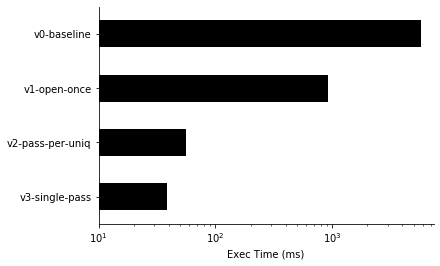

In [20]:
#q12
df = pd.DataFrame(list(zip(objects, times)),
                  columns =['objects', 'times']) 
ax = df.plot(kind='barh', legend = False, color = 'black', logx=True )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticklabels(objects)
ax.set_xlabel("Exec Time (ms)")
plt.xlim(10**1)

(10, 8637.01595537894)

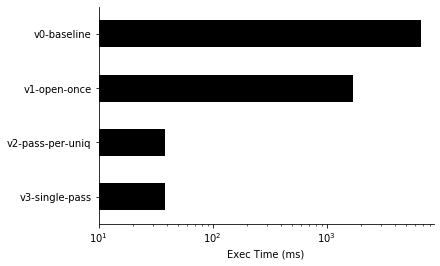

In [21]:
#q13
df = pd.DataFrame(list(zip(objects, times2)),
                  columns =['objects', 'times2']) 
ax = df.plot(kind='barh', legend = False, color = 'black', logx=True )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticklabels(objects)
ax.set_xlabel("Exec Time (ms)")
plt.xlim(10**1)

# Version 3 is better at checking multiple unique words, so if there is only 1 unique word then they
# will relatively have the same runtime. So version 3 will do better if there is more than 1 unique word

In [22]:
def measure(total_words, percent_unique, commit):
    unique_words = []
    for i in range(len(total_words)):
        unique = int(total_words[i] * (percent_unique/100))
        unique_words.append(time_run_sec(unique,total_words[i], 6, commit))
    return unique_words
v2, v3 = [], []
v2.append(measure([1000,2000,5000,10000], 1, "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5"))
v2.append(measure([1000,2000,5000,10000], 5,"c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5"))
v2.append(measure([1000,2000,5000,10000], 10,"c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5"))

v3.append(measure([1000,2000,5000,10000], 1, "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4"))
v3.append(measure([1000,2000,5000,10000], 5, "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4"))
v3.append(measure([1000,2000,5000,10000], 10, "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4"))

df1 = pd.DataFrame(list(zip(v2[0], v2[1],v2[2])),
                  columns =['10', '5', '1'], index =[1000,2000,5000,10000]) 
df1.index.names = ['total words']
df1.columns.names = ['percent unique']

df2 = pd.DataFrame(list(zip(v3[0], v3[1],v3[2])),
                  columns =['10', '5', '1'], index =[1000,2000,5000,10000]) 
df2.index.names = ['total words']
df2.columns.names = ['percent unique']

(0, 10000)

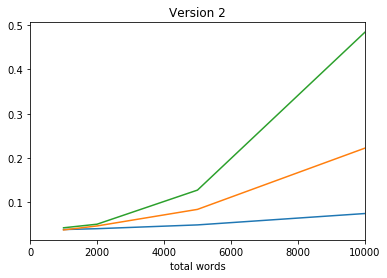

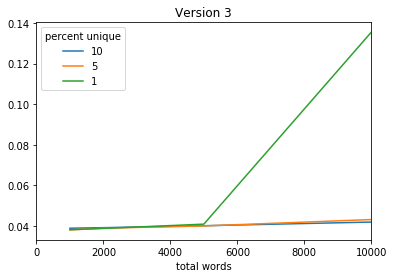

In [23]:
#q14
ax = df1.plot.line(legend =False, title = 'Version 2')
ax2 = df2.plot.line(title = 'Version 3')
ax.set_xlim(0,10000)
ax2.set_xlim(0,10000)

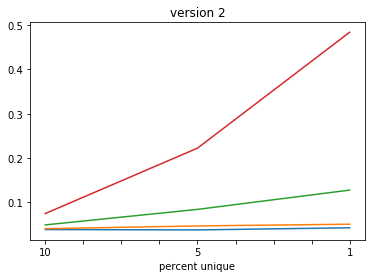

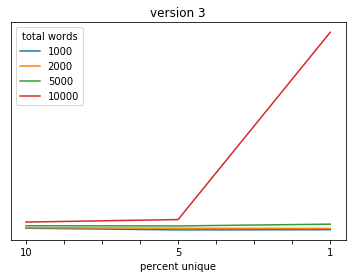

In [24]:
#q15
df1.T.plot.line(title = 'version 2', legend =False)
df2.T.plot.line(yticks = [], title = "version 3")
# I think q15 shows a better performance trend as there is more data that can be seen.
# The trends in q15 are more visually revealing than in q14

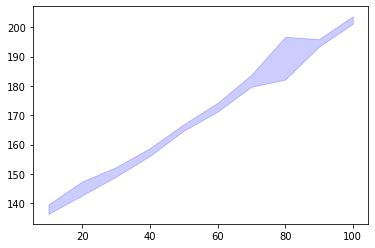

In [25]:
#q16
df = pd.DataFrame()
df.index.name = "total"
df.columns.name = "trial"
for i in range(10):
    total_words = 10000 * (i+1)
    uniq = total_words // 10
    for trial in range(5):
        df.loc[total_words/1000, trial] = time_run_sec(uniq, total_words, 6, "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4") * 1000 # TODO: call time_run_sec
mean = df.mean(axis=1)
std = df.std(axis=1)
plt.fill_between(mean.index, mean-std, mean+std, color='b', alpha=0.2)

In [26]:
class Counter:
    def __init__(self):
        self.count = {}
        self.value = 0
    def __setitem__(self,key, value):
        self.count[key.upper()] = value
        print(self.count)
    def __repr__(self):
        return str(self.count)
    def __getitem__(self, key):
        return self.count.get(key.upper(),0)
    def max_keys(self):
        maxi, max_list = 0, []
        for val in self.count:
            if self.count.get(val) > maxi:
                maxi = self.count.get(val)
        for val in self.count:
            if self.count.get(val) == maxi:
                max_list.append(val)
        return sorted(max_list)

In [27]:
#q17
c = Counter()
c['apple']

0

In [28]:
#q18
c = Counter()
c["apple"] += 1
c["banana"] += 1
c["BANANA"] += 1
c["kiwi"] += 2
c["banana"]

{'APPLE': 1}
{'APPLE': 1, 'BANANA': 1}
{'APPLE': 1, 'BANANA': 2}
{'APPLE': 1, 'BANANA': 2, 'KIWI': 2}


2

In [29]:
#q19
c

{'APPLE': 1, 'BANANA': 2, 'KIWI': 2}

In [30]:
#q20
c.max_keys()

['BANANA', 'KIWI']